# **Twitter US Airline Sentiment**

## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### Dataset:

The dataset has the following columns:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone

### Objective:

To implement the techniques learned as a part of the course.


### Learning Outcomes:

- Basic understanding of text pre-processing.
- What to do after text pre-processing
- Bag of words
- Tf-idf
- Build the classification model.
- Evaluate the Model
 

## **Importing the libraries**

In [1]:
# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

# Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         
import seaborn as sns
import matplotlib.pyplot as plt

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries for sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asvka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\asvka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
data.shape               # print shape of data.

(14640, 15)

- The data set has 14640 rows and 15 columns.

In [4]:
data.info()    #information of all columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

- The dataset has 11 object columns and 4 numerical columns.
- This dataset has missing values in 7 columns.
- "airline_sentiment_gold" and "negativereason_gold" columns has less entries.


In [5]:
# view some basic statistical details like percentile, mean, std etc. of a data frame of numeric values. 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


- "tweet_id" is unique to every user.
- The average retweet count is 8.

In [6]:
data.isnull().sum(axis=0)          # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

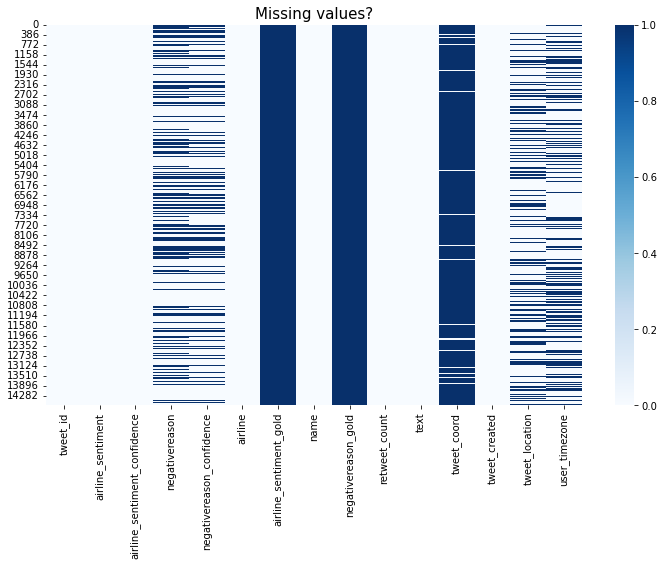

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(data.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

* The lines in the above heatmap will visualize the location of missing values (i.e. the missing value indexes in the dataframe).

In [8]:
# check the missing values for all the columns
def return_missing_values(data_frame):
    missing_values = data_frame.isnull().sum()
    missing_values = missing_values[missing_values>0]
    missing_values.sort_values(inplace=True)
    return missing_values

#plot the count of missing values in every column 
def plot_missing_values(data_frame):
    missing_values = return_missing_values(data_frame)
    missing_values = missing_values.to_frame()
    missing_values.columns = ['count']
    missing_values.index.names = ['Name']
    missing_values['Name'] = missing_values.index
    sns.set(style='darkgrid')
    sns.barplot(x='Name', y='count', data=missing_values)
    plt.title('Bar plot for Null Values in each column')
    plt.xticks(rotation=90)
    plt.show()

In [9]:
# get the count of missing values in every column of the dataframe
return_missing_values(data)

negativereason_confidence     4118
tweet_location                4733
user_timezone                 4820
negativereason                5462
tweet_coord                  13621
airline_sentiment_gold       14600
negativereason_gold          14608
dtype: int64

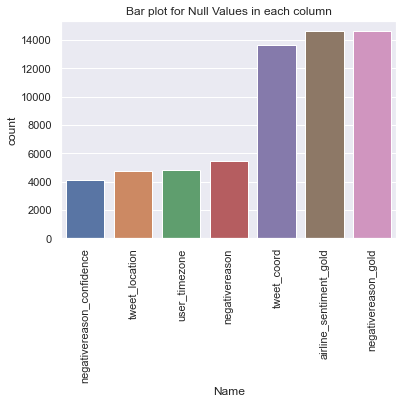

In [10]:
#plotting the count of missing values 
plot_missing_values(data)

- We can see that more data is missing from the 'tweet_coord', 'airline_sentiment_gold' and 'negativereason_gold' columns.

## Data Summary
- The data set has 14640 rows and 15 columns.
- The dataset has 11 object columns and 4 numerical columns.
- This dataset has missing values in 7 columns.
- We can see that more data is missing from the 'tweet_coord', 'airline_sentiment_gold' and 'negativereason_gold' columns.

## Exploratory Data Analysis

In [11]:
#The number of tweets per airline
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

- There are 6 airlines in our dataset.

In [12]:
#The percentage of tweets that each airline accounts in this dataset
(data[['airline', 'text']].groupby('airline').count()/len(data)).sort_values(by='text', ascending=False)

,text
airline,
United,0.261066
US Airways,0.198975
American,0.188456
Southwest,0.165301
Delta,0.151776
Virgin America,0.034426


Text(0.5, 1.0, 'Tweets Frequency by Airline')

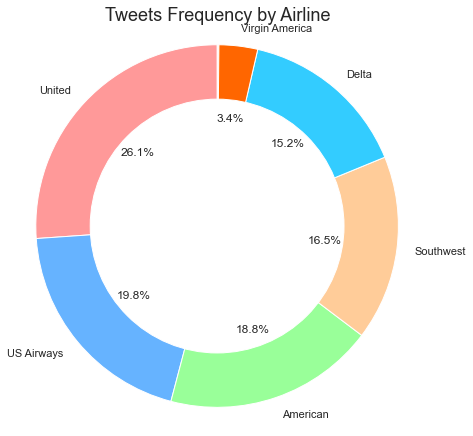

In [13]:
#Pie chart of tweets frequency for each airline
labels = ['United','US Airways','American','Southwest','Delta','Virgin America']
sizes = [0.261, 0.198, 0.188, 0.165, 0.152, 0.0344]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#33ccff', '#ff6600']
fig1, ax1 = plt.subplots(figsize=(6.5, 6))
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Tweets Frequency by Airline', fontsize=18)

- 'United' airlines has highest tweets with 26% where as 'Virgin America' has very less tweets with 3%.

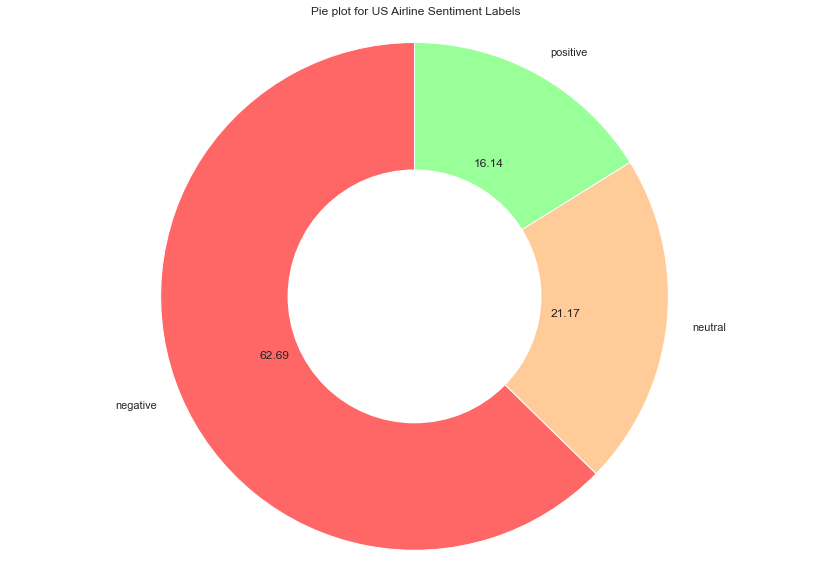

In [14]:
#plot for US Airline Sentiment Labels
#Using matplotlib
colors = ['#ff6666', '#ffcc99', '#99ff99']

sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = plt.pie(data['airline_sentiment'].value_counts(), labels=data['airline_sentiment'].value_counts().index, colors=colors, startangle=90,  autopct='%.2f')
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Pie plot for US Airline Sentiment Labels')
plt.axis('equal')
plt.tight_layout()
plt.show()

- Most of the tweets are negative in nature (62.69%), which indicates that users had bad experience with US airlines, followed by 21.17% neutral and 16.14% positive tweets.

Text(0, 0.5, 'Mood')

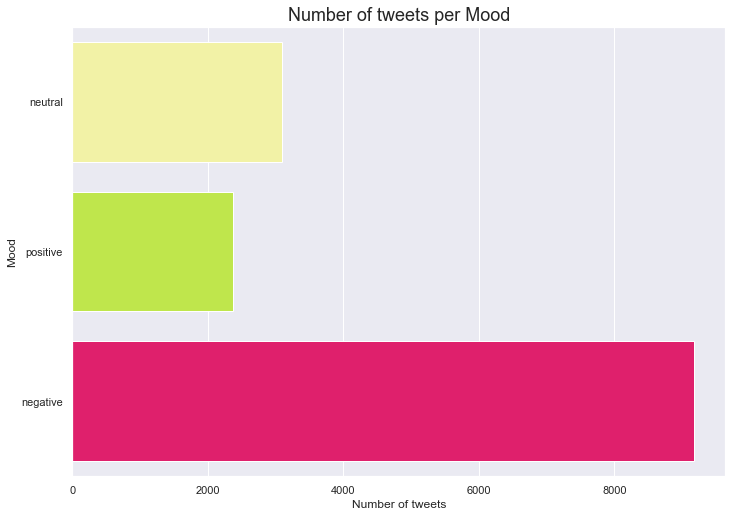

In [15]:
sns.countplot(y='airline_sentiment', data=data, palette=['#ffff99','#ccff33','#ff0066'])
plt.title('Number of tweets per Mood', fontsize=18)
plt.xlabel('Number of tweets')
plt.ylabel('Mood')

- 'Negative' sentiment has highest tweet counts more than 8000 followed by 'Neutral' sentiment with tweet counts with 3000.
- 'Positive' sentiment least tweet counts with less than 3000.

In [16]:
#How customers feel about each airline
pd.crosstab(data.airline, data.airline_sentiment)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


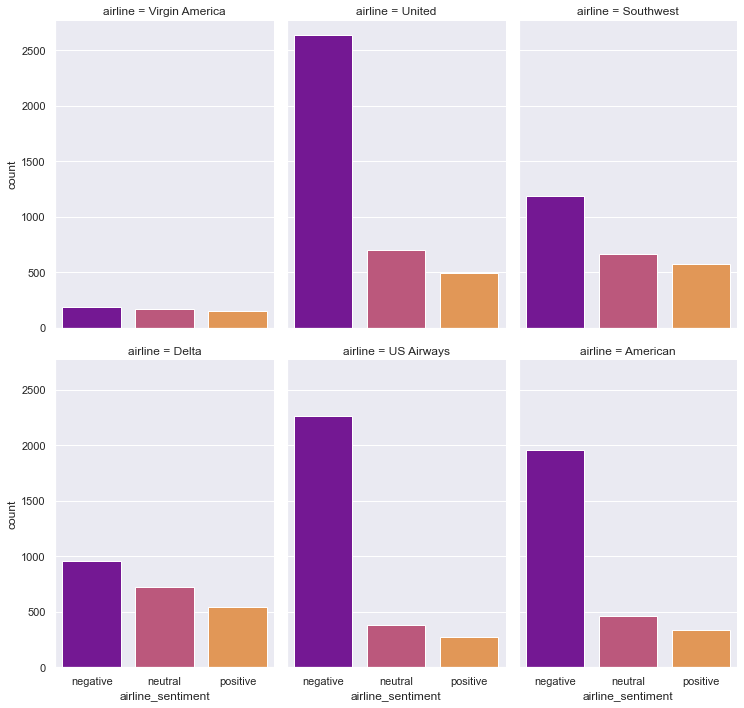

In [17]:
g = sns.FacetGrid(data, col="airline", col_wrap=3, height=5, aspect =0.7)
g = g.map(sns.countplot, "airline_sentiment",order =data.airline_sentiment.value_counts().index, palette='plasma')
plt.show()

- Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
- Virgin America has the least number of negative reviews

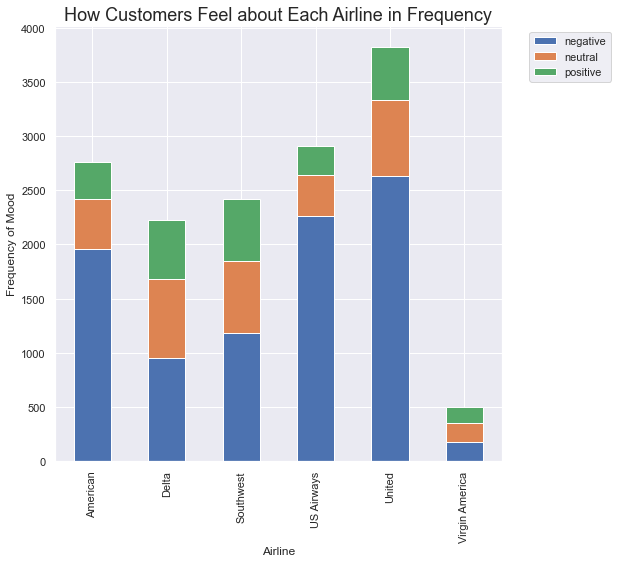

In [18]:
#Visualize sentiment per airline
_ = pd.crosstab(data.airline, data.airline_sentiment).plot(kind="bar",title='How Customers Feel about Each Airline in Frequency',figsize=(8,8),stacked=True)
_.title.set_size(18)
_.set_xlabel('Airline')
_.set_ylabel('Frequency of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

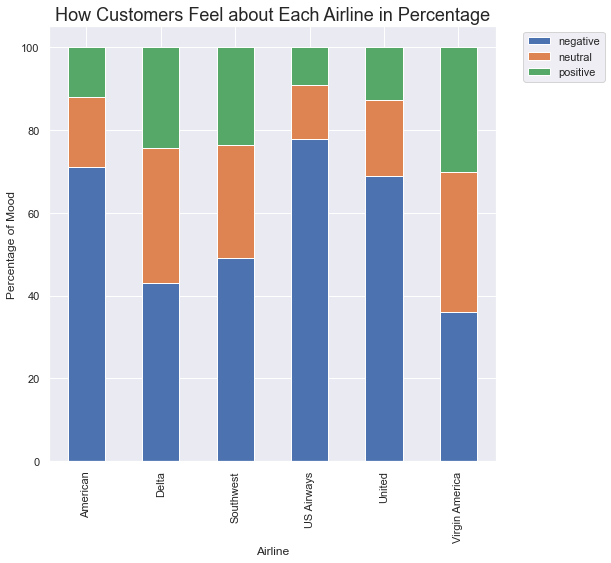

In [19]:
#Visualize sentiment in precentage per airline
_ = pd.crosstab(data.airline, data.airline_sentiment).apply(lambda x: x / x.sum() * 100, axis=1).plot(kind='bar',title='How Customers Feel about Each Airline in Percentage',figsize=(8,8),stacked=True)
_.title.set_size(18)
_.set_xlabel('Airline')
_.set_ylabel('Percentage of Mood')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

**Plot for Negative reasons**

Text(0, 0.5, 'Negative Reasons')

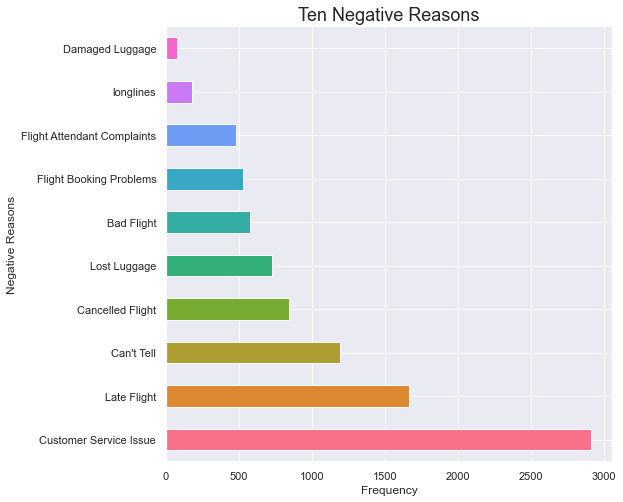

In [20]:
#Visualize how many tweets per negative reasons
colors = sns.color_palette('husl',10)
data.negativereason.value_counts().plot(kind='barh',color=colors,figsize=(8,8))
plt.title('Ten Negative Reasons', fontsize=18)
plt.xlabel('Frequency')
plt.ylabel('Negative Reasons')

- 'Customer Service Issue and Late Flight are the top two reasons for 'Negative' tweets.

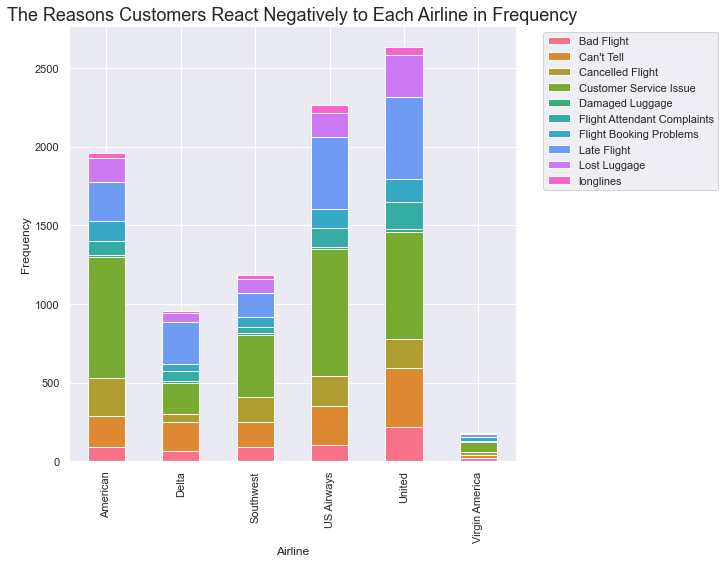

In [21]:
#Visualize negaive reasons per airline
colors = sns.color_palette('husl',10)
pd.crosstab(data.airline, data.negativereason).plot(kind='bar',color=colors,figsize=(8,8),stacked=True)
plt.title('The Reasons Customers React Negatively to Each Airline in Frequency', fontsize=18)
plt.xlabel('Airline')
plt.ylabel('Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

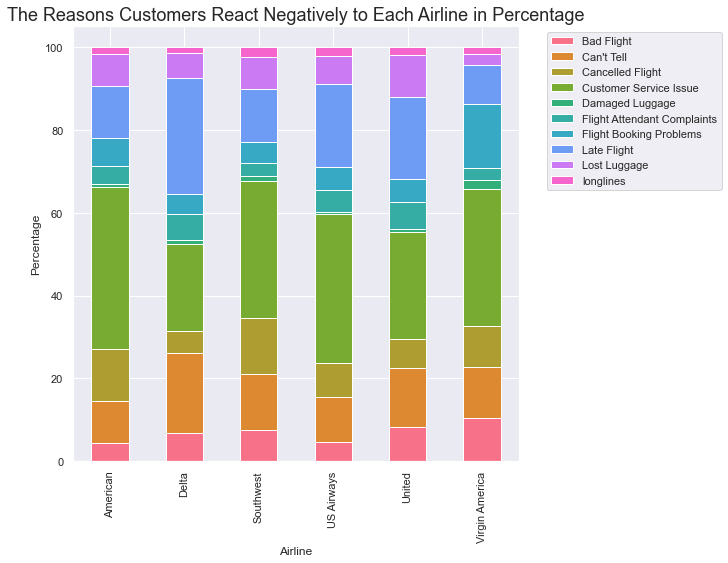

In [22]:
#Visualize negative reasons in precentage per airline
colors=sns.color_palette("husl",10)
pd.crosstab(data.airline, data.negativereason).apply(lambda x: x/x.sum() * 100, axis=1).plot(kind="bar",color = colors,figsize=(8,8),stacked=True)
plt.title('The Reasons Customers React Negatively to Each Airline in Percentage', fontsize=18)
plt.xlabel('Airline')
plt.ylabel('Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [23]:
#The top 5 negative reasons
data.negativereason.value_counts().sort_values(ascending=False).head(5)

Customer Service Issue    2910
Late Flight               1665
Can't Tell                1190
Cancelled Flight           847
Lost Luggage               724
Name: negativereason, dtype: int64

<AxesSubplot:xlabel='negativereason', ylabel='count'>

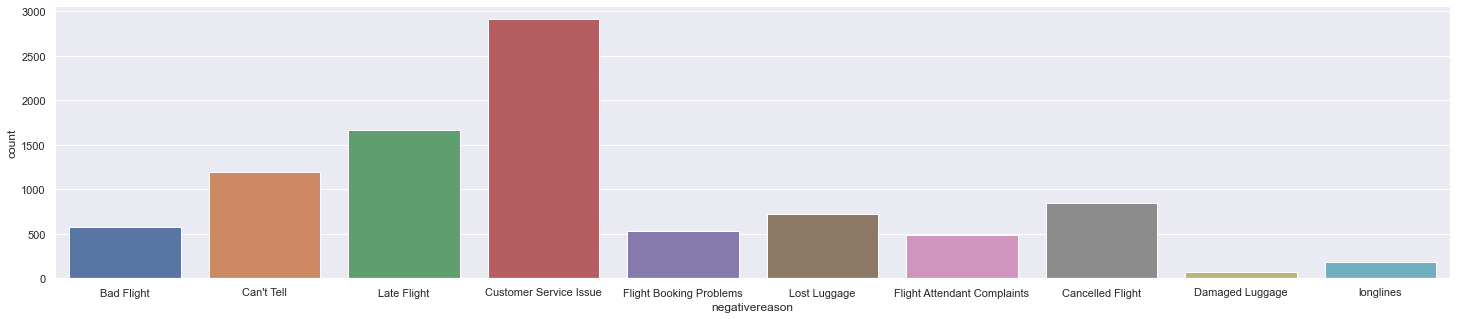

In [24]:
#plotting negative reason
plt.figure(figsize=(25,5)) 
sns.countplot(data.negativereason)

## EDA Summary:
- 'United' airlines has highest tweets with 26% where as 'Virgin America' has very less tweets with 3%.
- Most of the tweets are negative in nature (62.69%), which indicates that users had bad experience with US airlines, followed by 21.17% neutral and 16.14% positive tweets.
- 'Negative' sentiment has highest tweet counts more than 8000 followed by 'Neutral' sentiment with tweet counts with 3000.
- 'Positive' sentiment least tweet counts with less than 3000.
- Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
- Virgin America has the least number of negative reviews
- Customer service and Late flight seems to be the main reason why customers are giving bad feedback.

## Understand of data-columns:

   - a. Drop all other columns except “text” and “airline_sentiment”.
   - b. Check the shape of data.
   - c. Print first 5 rows of data.

In [25]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

**Drop Irrelevant columns**

In [26]:
# Let us now remove irrelevant columns
data_relevant = data.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis =1)

**Shape of Data**

In [27]:
data_relevant.shape

(14640, 2)

- There are 14640 rows and 2 columns.

**Printing first 5 rows of data**

In [28]:
data_relevant.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [29]:
print(data_relevant.airline_sentiment.value_counts())

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

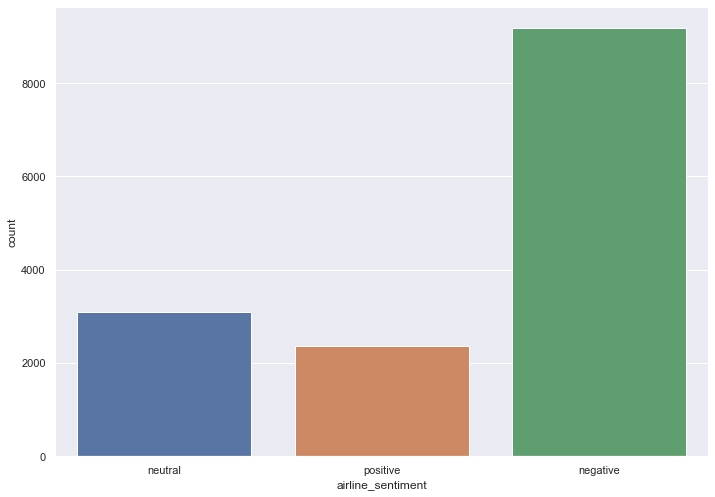

In [30]:
sns.countplot(data_relevant['airline_sentiment'])

- There is data imbalance in our dataset.
- The percentage of negative sentiment is high.

## Data Pre - Processing

- **Text pre-processing:**

        a. Html tag removal.
        b. Tokenization.
        c. Remove the numbers.
        d. Removal of Special Characters and Punctuations.
        e. Removal of stopwords
        f. Conversion to lowercase. 
        g. Lemmatize or stemming. 
        h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) 
        i. Print the first 5 rows of data after pre-processing.

### Html tag removal

In [31]:
def perform_html_cleanup( raw_review ):
  # 1. Remove HTML
  review_text = BeautifulSoup(raw_review).get_text()
  return review_text

### Replace Contraction

In [32]:
def replace_contractions(raw_review):
    #Replace contractions in raw_review
    return contractions.fix(raw_review)

### Tokenization

In [33]:
def perform_tokenization( raw_review ):
  # 2. Perform Tokenization
  word_tokens = word_tokenize(raw_review)  # Tokenization
  return word_tokens

### Removal of Numbers

In [34]:
def remove_numbers(list_of_words): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

### Remove special characters and punctuations

In [35]:
def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

In [36]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

### Remove the stop words

In [37]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

### Conversion to lowercase

In [38]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

### Remove empty String

In [39]:
def remove_empty_string(words):
  return list(filter(None, words))

### stemming

In [40]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

### Lemmatize

In [41]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

### Complete Pre-preocessing

### Join the words in the list to convert back to text string in the data frame. 

(So that each row contains the data in text format.)

In [42]:
lemmatizer = WordNetLemmatizer()
def normalize(raw_review):
    clean_review = perform_html_cleanup(raw_review)
    clean_review = replace_contractions(clean_review)
    clean_review = perform_tokenization(clean_review)
    clean_review = remove_numbers(clean_review)
    clean_review = remove_special_character_punctuation(clean_review)
    clean_review = remove_punctuation(clean_review)
    clean_review  = to_lowercase(clean_review)
    clean_review = remove_empty_string(clean_review)
    #clean_review = stem_words(clean_review)
    clean_review = remove_stopwords(clean_review)
    clean_review = lemmatize_verbs(clean_review)
    return ' '.join(clean_review)

#### Print the first 5 rows of data before pre-processing

In [43]:
data_relevant.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


#### Applying all preprocessing to 'text' column

In [44]:
data_relevant['text'] = data_relevant.apply(lambda row: normalize(row['text']), axis=1)

#### Print the first 5 rows of data after pre-processing.

In [45]:
data_relevant.head(5)

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


## **Sentiment Analysis**

## Vectorization

a. Use CountVectorizer.

b. Use TfidfVectorizer.


### Bag of Words (CountVectorizer)

In BoW, we construct a dictionary that contains the set of all unique words from our text review dataset. The frequency of the word is counted here. If there are d unique words in our dictionary then for every review the vector will be of length d and count of word from reviews is stored at its particular location in vector. The vector will be highly sparse in such cases.

In [46]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data_relevant['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [47]:
data_features.shape       #Shape of the feature vector

(14640, 2000)

In [48]:
X = data_features

y = data_relevant.airline_sentiment

In [49]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [50]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [51]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

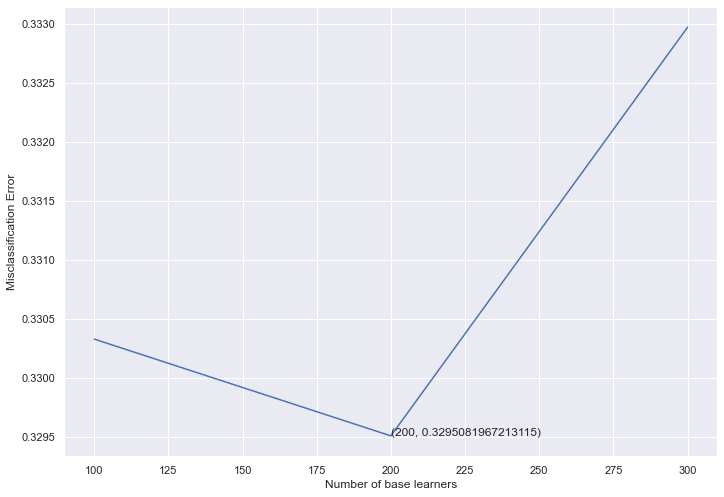

In [52]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [53]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['neutral' , 'positive', 'negative']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

     neutral       0.84      0.91      0.87      2627
    positive       0.52      0.37      0.44       577
    negative       0.69      0.62      0.65       456

    accuracy                           0.79      3660
   macro avg       0.68      0.63      0.65      3660
weighted avg       0.77      0.79      0.78      3660

Accuracy of the model is :  0.7890710382513662


**Observation**
- The Accouracy of the model is 78.90% which is good since Count vectorization uses only the frequency of the words.
- Precision, Recall and f1-score are good for 'neutral' sentiment when compared with 'positive' and 'negative' sentiments.
- 'positive' sentiments have least values for precision, recall and f1-score .

[[2390  158   79]
 [ 312  216   49]
 [ 134   40  282]]


<AxesSubplot:>

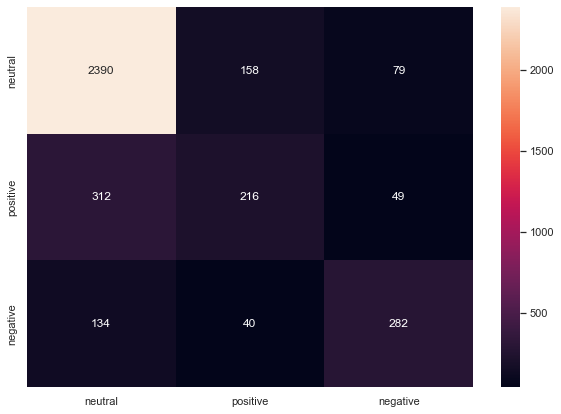

In [54]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['neutral' , 'positive', 'negative']],
                  columns = [i for i in ['neutral' , 'positive', 'negative']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

- 'neutral' sentiment is predicted well when compared with other sentiments.

Top 40 features:
thank,usairways,great,delay,jetblue,unite,http,flight,love,southwestair,hold,hours,awesome,bag,get,cancel,hour,virginamerica,amaze,wait,time,best,customer,please,help,fly,service,plane,make,go,call,would,follow,dm,lose,need,still,airline,good,say,
 
 


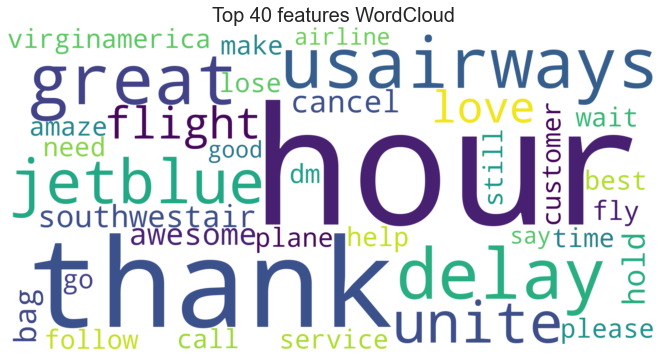

In [55]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','

print("Top 40 features:")
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

### **TF-IDF**

**Term Frequency -  Inverse Document Frequency:** It makes sure that less importance is given to the most frequent words, and it also considers less frequent words.

In [56]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=2000)
data_features = tfidf_vect.fit_transform(data_relevant['text'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(14640, 2000)

In [57]:
X = data_features

y = data_relevant.airline_sentiment

In [58]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [59]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [60]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

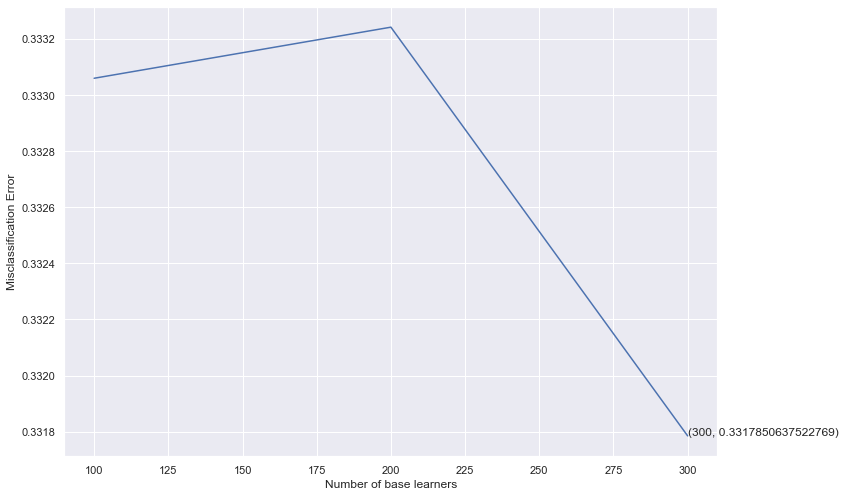

In [61]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [62]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['neutral' , 'positive', 'negative']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

     neutral       0.80      0.96      0.88      2627
    positive       0.58      0.18      0.27       577
    negative       0.72      0.54      0.61       456

    accuracy                           0.79      3660
   macro avg       0.70      0.56      0.59      3660
weighted avg       0.76      0.79      0.75      3660

Accuracy of the model is :  0.7852459016393443


**Observation**
- The Accouracy of the model TF-IDF is 78.52% which is good but less than accuracy of 'Count Vectorization' model since TF-IDF vectorization not uses only the frequency of the words but also checks for the important words in our word corpus.
- Precision, Recall and f1-score are good for 'neutral' sentiment when compared with 'positive' and 'negative' sentiments.
- 'positive' sentiments have least values for precision, recall and f1-score .

[[2525   49   53]
 [ 429  103   45]
 [ 184   26  246]]


<AxesSubplot:>

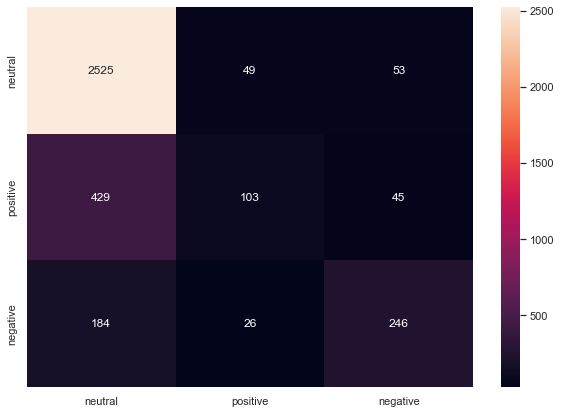

In [63]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['neutral' , 'positive', 'negative']],
                  columns = [i for i in ['neutral' , 'positive', 'negative']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

thank, unite, jetblue, southwestair, usairways, http, great, flight, delay, virginamerica, love, get, hold, awesome, hours, bag, cancel, best, amaze, hour, dm, fly, please, good, time, service, follow, make, wait, help, customer, would, much, go, call, need, appreciate, send, plane, still, 
 
 


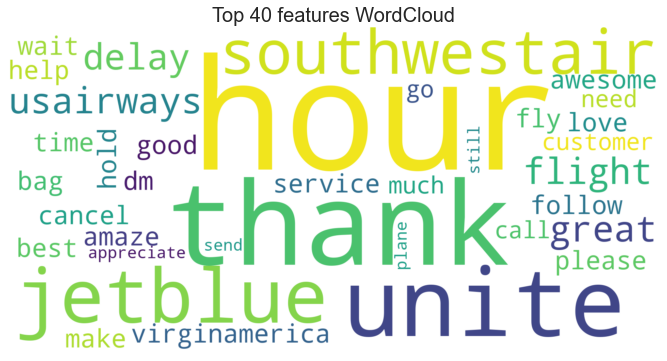

In [64]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## **Comparing the accuracies of Supervised Learning methods i.e Count Vectorizer and TF-IDF**

In [65]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,negative,negative,negative
1,negative,negative,negative
2,negative,negative,negative
3,negative,negative,negative
4,positive,negative,negative


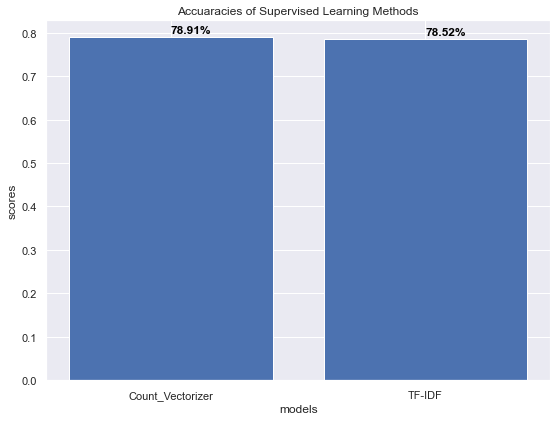

In [66]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

* **Count Vectorizer shows a better performance than TF-IDF Vectorizer**, even though this only focuses on the frequency of words present in the corpus but not the importance of the words. we get better performance using Count Vectorizer.
* **Both the models** shows good performance in test data.
* **Accuracy Scores of both models are > 75%**.

# **Conclusions**
#### The below are the takeaway points from the above case study
- `Exploratory Data Analysis:`
    - 'United' airlines has highest tweets with 26% where as 'Virgin America' has very less tweets with 3%.
    - Most of the tweets are negative in nature (62.69%), which indicates that users had bad experience with US airlines, followed by 21.17% neutral and 16.14% positive tweets.
    - 'Negative' sentiment has highest tweet counts more than 8000 followed by 'Neutral' sentiment with tweet counts with 3000.
    - 'Positive' sentiment least tweet counts with less than 3000.
    - Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
    - Virgin America has the least number of negative reviews
    - Customer service and Late flight seems to be the main reason why customers are giving bad feedback.   
   
- `Understand of data-columns:`
    - Our data set has imbalance data. 
    - Most of the reviews are 'Negative' sentiment.
    
- Text preprocessing methods.   

- Working on Encoding text data using Count Vectorizer and TF-IDF and  classifying them using Machine learning models.

- RandomForestClassifier on CountVectorizer has an accuracy of 78.91% whereas RandomForestClassifier on  TfidfVectorizer has an accuracy of 78.52%. This shows that the model using CountVectorizer is better.

- Comparing the Machine learning models' performance with Sentiment Analysis using Python packages to check which one gave better and more accurate results.

- Model is able to predict airline sentiment correctly 78% of the time.